### CUSTOMER CHURN PREDICTION

### This model aims at predicting when customers stop doing business with a company.For example, a customer canceling a subscription or switching to a competitor. Businesses care about predicting churn so they can take action to retain customers.

### Importing the necessary libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### Loading the dataset

In [69]:
company = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
company

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Data Preprocessing and Exporatory Data Analysis(EDA)

In [70]:
## loading the first five rows
company.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [71]:
## loading the last five rows
company.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [72]:
## Describing the data
company.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [73]:
## getting info about the data
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [74]:
## checking for null values
company.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
## checking for the shape of the data i.e. number of rows and the number of columns
company.shape

(7043, 21)

In [ ]:
## assigning y to the Churn feature

y = company['Churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [208]:
x = company.drop(['tenure', 'customerID'], axis=1)
x

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
## using OneHotEncoder to convert integers to floats
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features =['gender', 'SeniorCitizen','Partner', 'Dependents', 'PhoneService','OnlineSecurity', 'MultipleLines', 'InternetService', 'PaymentMethod', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'Churn'] 
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
x = x.replace(' ', 0)
transformed_x = transformer.fit_transform(x).astype(float)
transformed_x

array([[1.0000e+00, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 2.9850e+01,
        2.9850e+01],
       [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 0.0000e+00, 5.6950e+01,
        1.8895e+03],
       [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.0000e+00, 5.3850e+01,
        1.0815e+02],
       ...,
       [1.0000e+00, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 2.9600e+01,
        3.4645e+02],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 7.4400e+01,
        3.0660e+02],
       [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 0.0000e+00, 1.0565e+02,
        6.8445e+03]], shape=(7043, 47))

In [219]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,29.85,29.85
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,56.95,1889.50
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,53.85,108.15
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,42.30,1840.75
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,84.80,1990.50
7039,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,103.20,7362.90
7040,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,29.60,346.45
7041,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,74.40,306.60


In [ ]:
## using LabelEncoder to convert Churn variable from integer to float
from sklearn.preprocessing import LabelEncoder

LabelEncoder = LabelEncoder()
transformed_y = LabelEncoder.fit_transform(company['Churn']).astype(float)

In [220]:
pd.DataFrame(transformed_y)

,0
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
7038,0.0
7039,0.0
7040,0.0
7041,1.0


In [221]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,29.85,29.85
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,56.95,1889.50
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,53.85,108.15
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,42.30,1840.75
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,84.80,1990.50
7039,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,103.20,7362.90
7040,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,29.60,346.45
7041,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,74.40,306.60


### Splitting the data for training anf testing

In [222]:
## using sklearn to select the model to use and also the training and testing of our data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_x,transformed_y, test_size=0.2, random_state=100)

In [223]:
X_train

array([[0.00000e+00, 1.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        5.43000e+01, 2.39045e+03],
       [1.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        9.56000e+01, 2.59525e+03],
       [1.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        6.89500e+01, 1.19750e+02],
       ...,
       [0.00000e+00, 1.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.84000e+01, 4.85535e+03],
       [0.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        8.01500e+01, 3.85000e+02],
       [0.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.96000e+01, 7.96000e+01]], shape=(5634, 47))

In [224]:
X_test

array([[0.00000e+00, 1.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.05500e+01, 1.06765e+03],
       [0.00000e+00, 1.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        1.98500e+01, 1.43410e+03],
       [0.00000e+00, 1.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.88000e+01, 4.11135e+03],
       ...,
       [1.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        1.03650e+02, 3.98850e+03],
       [1.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        9.92000e+01, 3.75460e+03],
       [1.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        7.93000e+01, 3.90245e+03]], shape=(1409, 47))

In [225]:
y_train

array([0., 0., 1., ..., 0., 1., 1.], shape=(5634,))

In [226]:
y_test

array([0., 0., 0., ..., 0., 1., 0.], shape=(1409,))

In [227]:
pd.DataFrame(y)

,0
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
7038,0.0
7039,0.0
7040,0.0
7041,1.0


### Model Building

In [ ]:
## using linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [229]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)
print(y_lr_train_pred, y_lr_test_pred)

[-2.49800181e-15  6.05071548e-15  1.00000000e+00 ... -3.55271368e-15
  1.00000000e+00  1.00000000e+00] [-7.54951657e-15 -8.32667268e-15 -1.33226763e-15 ...  6.05071548e-15
  1.00000000e+00  0.00000000e+00]


In [230]:
y_lr_train_pred

array([-2.49800181e-15,  6.05071548e-15,  1.00000000e+00, ...,
       -3.55271368e-15,  1.00000000e+00,  1.00000000e+00], shape=(5634,))

In [231]:
y_lr_test_pred

array([-7.54951657e-15, -8.32667268e-15, -1.33226763e-15, ...,
        6.05071548e-15,  1.00000000e+00,  0.00000000e+00], shape=(1409,))

In [233]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [234]:
lr_test_mse

2.813976487782082e-29

In [235]:
lr_train_mse

2.7750910940171185e-29

In [236]:
lr_train_r2

1.0

In [237]:
lr_test_r2

1.0

In [238]:

lr_results = pd.DataFrame(['LinearRegression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [239]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,LinearRegression,0.0,1.0,0.0,1.0


In [241]:
## Training the model using Random Forest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [242]:
## Applying the model
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [243]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [244]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [245]:
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,0.0,1.0,0.0,1.0


### Model Comparison

In [246]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models.reset_index()

,index,Method,Training MSE,Training R2,Test MSE,Test R2
0,0,LinearRegression,0.0,1.0,0.0,1.0
1,0,Random Forest,0.0,1.0,0.0,1.0


### Data Visualization

Text(0.5, 0, 'Experimental Churn')

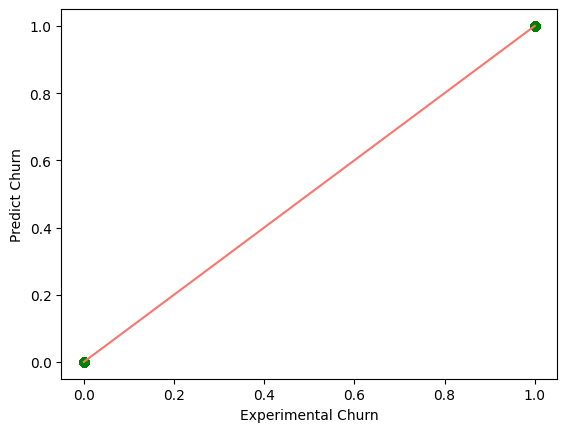

In [247]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3, c='green')

z = np.polyfit(y_train, y_lr_train_pred, 1)
p= np.poly1d(z)

plt.plot(y_train, p(y_train), c='#F8766D')
plt.ylabel('Predict Churn')
plt.xlabel('Experimental Churn')